# 10 Minutes to pandas
请参阅[官方文档](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [1]:
# 设置为 inline 风格
%matplotlib inline
# 包导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据整形

In [2]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.072026  0.422077
      two    -1.099181 -0.354796
baz   one     1.285500 -1.185525
      two     0.645316 -0.660115
foo   one     0.696443 -1.664527
      two     0.718399 -0.154125
qux   one    -0.740052  0.713089
      two    -0.672748 -1.346843

In [3]:
df.loc['bar']

,A,B
second,,
one,0.072026,0.422077
two,-1.099181,-0.354796


In [4]:
df.loc['bar'].loc['one']

A    0.072026
B    0.422077
Name: one, dtype: float64

In [5]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.072026
               B    0.422077
       two     A   -1.099181
               B   -0.354796
baz    one     A    1.285500
               B   -1.185525
       two     A    0.645316
               B   -0.660115
foo    one     A    0.696443
               B   -1.664527
       two     A    0.718399
               B   -0.154125
qux    one     A   -0.740052
               B    0.713089
       two     A   -0.672748
               B   -1.346843
dtype: float64

In [6]:
stacked.loc['bar'].loc['one'].loc['A']

0.072026163089430537

In [7]:
stacked.unstack()

A         B
first second                    
bar   one     0.072026  0.422077
      two    -1.099181 -0.354796
baz   one     1.285500 -1.185525
      two     0.645316 -0.660115
foo   one     0.696443 -1.664527
      two     0.718399 -0.154125
qux   one    -0.740052  0.713089
      two    -0.672748 -1.346843

In [8]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar     0.072026 -1.099181  0.422077 -0.354796
baz     1.285500  0.645316 -1.185525 -0.660115
foo     0.696443  0.718399 -1.664527 -0.154125
qux    -0.740052 -0.672748  0.713089 -1.346843

In [9]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.072026 -1.099181
      B  0.422077 -0.354796
baz   A  1.285500  0.645316
      B -1.185525 -0.660115
foo   A  0.696443  0.718399
      B -1.664527 -0.154125
qux   A -0.740052 -0.672748
      B  0.713089 -1.346843

### 数据透视表

pivot table/轴向旋转表

In [10]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.477533,1.557713
1,one,B,foo,0.019528,2.483014
2,two,C,foo,-0.912452,0.409732
3,three,A,bar,0.502807,-0.462401
4,one,B,bar,1.709597,-1.739413
5,one,C,bar,-0.658155,1.302735
6,two,A,foo,0.007806,0.782926
7,three,B,foo,-0.067922,-0.193820
8,one,C,foo,0.806713,0.383870
9,one,A,bar,0.794017,0.749756


In [11]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.794017  1.477533
      B  1.709597  0.019528
      C -0.658155  0.806713
three A  0.502807       NaN
      B       NaN -0.067922
      C  0.464731       NaN
two   A       NaN  0.007806
      B -0.532554       NaN
      C       NaN -0.912452

In [12]:
pd.pivot_table(df, values=['E'], index=['A'], columns=['C'])

E          
C           bar       foo
A                        
one    0.104360  1.474866
three  0.353011 -0.193820
two   -0.811900  0.596329

In [13]:
df[df.A=='one'].groupby('C').mean()

,D,E
C,,
bar,0.615153,0.104360
foo,0.767925,1.474866


### 时间序列

pandas 提供了强大的时间序列功能，比如把秒级的股票数据转换为5分钟周期数据等。

In [14]:
rng = pd.date_range('20160301', periods=600, freq='s')
rng

DatetimeIndex(['2016-03-01 00:00:00', '2016-03-01 00:00:01',
               '2016-03-01 00:00:02', '2016-03-01 00:00:03',
               '2016-03-01 00:00:04', '2016-03-01 00:00:05',
               '2016-03-01 00:00:06', '2016-03-01 00:00:07',
               '2016-03-01 00:00:08', '2016-03-01 00:00:09',
               ...
               '2016-03-01 00:09:50', '2016-03-01 00:09:51',
               '2016-03-01 00:09:52', '2016-03-01 00:09:53',
               '2016-03-01 00:09:54', '2016-03-01 00:09:55',
               '2016-03-01 00:09:56', '2016-03-01 00:09:57',
               '2016-03-01 00:09:58', '2016-03-01 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')

In [15]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2016-03-01 00:00:00     34
2016-03-01 00:00:01      4
2016-03-01 00:00:02    382
2016-03-01 00:00:03    164
2016-03-01 00:00:04    178
2016-03-01 00:00:05    421
2016-03-01 00:00:06     34
2016-03-01 00:00:07     71
2016-03-01 00:00:08    316
2016-03-01 00:00:09    201
2016-03-01 00:00:10    214
2016-03-01 00:00:11    443
2016-03-01 00:00:12    185
2016-03-01 00:00:13     79
2016-03-01 00:00:14     38
2016-03-01 00:00:15    465
2016-03-01 00:00:16    309
2016-03-01 00:00:17     93
2016-03-01 00:00:18     20
2016-03-01 00:00:19    338
2016-03-01 00:00:20    149
2016-03-01 00:00:21     34
2016-03-01 00:00:22    257
2016-03-01 00:00:23    462
2016-03-01 00:00:24     41
2016-03-01 00:00:25    471
2016-03-01 00:00:26    313
2016-03-01 00:00:27    224
2016-03-01 00:00:28     78
2016-03-01 00:00:29    498
                      ... 
2016-03-01 00:09:30     61
2016-03-01 00:09:31    315
2016-03-01 00:09:32    388
2016-03-01 00:09:33    391
2016-03-01 00:09:34    263
2016-03-01 00:09:35     11
2

In [16]:
ts.resample('2Min', how='sum')

2016-03-01 00:00:00    28595
2016-03-01 00:02:00    29339
2016-03-01 00:04:00    28991
2016-03-01 00:06:00    30789
2016-03-01 00:08:00    30131
Freq: 2T, dtype: int32

时区表达与转换

In [17]:
rng = pd.date_range('20160301', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2016-03-01    1.048036
2016-03-02   -1.232093
2016-03-03    0.519777
2016-03-04    0.213931
2016-03-05    0.184069
Freq: D, dtype: float64

In [18]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2016-03-01 00:00:00+00:00    1.048036
2016-03-02 00:00:00+00:00   -1.232093
2016-03-03 00:00:00+00:00    0.519777
2016-03-04 00:00:00+00:00    0.213931
2016-03-05 00:00:00+00:00    0.184069
Freq: D, dtype: float64

In [19]:
ts_utc.tz_convert('Asia/Shanghai')

2016-03-01 08:00:00+08:00    1.048036
2016-03-02 08:00:00+08:00   -1.232093
2016-03-03 08:00:00+08:00    0.519777
2016-03-04 08:00:00+08:00    0.213931
2016-03-05 08:00:00+08:00    0.184069
Freq: D, dtype: float64

在不同的时间表达方式间转换

In [20]:
rng = pd.date_range('20160301', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2016-03-31    1.869095
2016-04-30   -0.698419
2016-05-31   -0.796308
2016-06-30   -1.624937
2016-07-31    0.118491
Freq: M, dtype: float64

In [21]:
ps = ts.to_period()
ps

2016-03    1.869095
2016-04   -0.698419
2016-05   -0.796308
2016-06   -1.624937
2016-07    0.118491
Freq: M, dtype: float64

In [22]:
ps.to_timestamp()

2016-03-01    1.869095
2016-04-01   -0.698419
2016-05-01   -0.796308
2016-06-01   -1.624937
2016-07-01    0.118491
Freq: MS, dtype: float64

In [23]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [24]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.403397
1990Q2    0.052607
1990Q3    0.683487
1990Q4   -0.871958
1991Q1    0.860426
1991Q2   -1.203006
1991Q3   -0.190948
1991Q4   -1.722338
1992Q1    0.093187
1992Q2   -1.732760
1992Q3   -0.039225
1992Q4    1.814737
1993Q1   -0.201548
1993Q2   -0.550538
1993Q3   -0.409734
1993Q4   -0.615150
1994Q1    1.207771
1994Q2   -0.002279
1994Q3    0.105491
1994Q4   -0.182737
1995Q1   -0.083805
1995Q2    0.174109
1995Q3    0.742054
1995Q4    0.620141
1996Q1   -0.471295
1996Q2   -1.926356
1996Q3   -0.631435
1996Q4   -0.218897
1997Q1   -1.792132
1997Q2    0.844161
1997Q3   -0.745867
1997Q4    0.887393
1998Q1    0.558465
1998Q2    0.523789
1998Q3    0.844993
1998Q4    1.329418
1999Q1   -1.554542
1999Q2    1.627259
1999Q3    1.569094
1999Q4    0.035025
2000Q1    1.668087
2000Q2   -0.845356
2000Q3    0.633963
2000Q4   -0.155322
Freq: Q-NOV, dtype: float64

In [25]:
ts.index

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [26]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00    0.403397
1990-06-01 09:00    0.052607
1990-09-01 09:00    0.683487
1990-12-01 09:00   -0.871958
1991-03-01 09:00    0.860426
1991-06-01 09:00   -1.203006
1991-09-01 09:00   -0.190948
1991-12-01 09:00   -1.722338
1992-03-01 09:00    0.093187
1992-06-01 09:00   -1.732760
1992-09-01 09:00   -0.039225
1992-12-01 09:00    1.814737
1993-03-01 09:00   -0.201548
1993-06-01 09:00   -0.550538
1993-09-01 09:00   -0.409734
1993-12-01 09:00   -0.615150
1994-03-01 09:00    1.207771
1994-06-01 09:00   -0.002279
1994-09-01 09:00    0.105491
1994-12-01 09:00   -0.182737
1995-03-01 09:00   -0.083805
1995-06-01 09:00    0.174109
1995-09-01 09:00    0.742054
1995-12-01 09:00    0.620141
1996-03-01 09:00   -0.471295
1996-06-01 09:00   -1.926356
1996-09-01 09:00   -0.631435
1996-12-01 09:00   -0.218897
1997-03-01 09:00   -1.792132
1997-06-01 09:00    0.844161
1997-09-01 09:00   -0.745867
1997-12-01 09:00    0.887393
1998-03-01 09:00    0.558465
1998-06-01 09:00    0.523789
1998-09-01 09:

### 类别数据

Categorical 是 pandas 0.15 版本才加入的新功能。用来表达类别数据。

In [27]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [28]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [29]:
df["grade"].cat.categories

Index([u'a', u'b', u'e'], dtype='object')

In [30]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [31]:
df.sort_values(by='grade', ascending=True)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [32]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

### 画图

In [33]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20000101', periods=1000))
ts = ts.cumsum()
ts

2000-01-01     0.416424
2000-01-02     0.603304
2000-01-03    -0.237965
2000-01-04     0.317450
2000-01-05     0.665045
2000-01-06     2.468087
2000-01-07     2.758852
2000-01-08     2.271343
2000-01-09     3.129609
2000-01-10     5.171241
2000-01-11     5.049896
2000-01-12     5.185316
2000-01-13     4.169058
2000-01-14     2.862306
2000-01-15     4.018617
2000-01-16     4.456694
2000-01-17     5.824236
2000-01-18     6.094983
2000-01-19     5.880954
2000-01-20     5.875111
2000-01-21     6.008481
2000-01-22     6.835501
2000-01-23     7.480405
2000-01-24     6.849335
2000-01-25     7.608887
2000-01-26     9.029474
2000-01-27     8.859222
2000-01-28     7.162806
2000-01-29     7.398013
2000-01-30     7.391844
                ...    
2002-08-28    21.728409
2002-08-29    21.757852
2002-08-30    21.047643
2002-08-31    20.114996
2002-09-01    18.769902
2002-09-02    17.417680
2002-09-03    17.917688
2002-09-04    18.064786
2002-09-05    19.312356
2002-09-06    18.633479
2002-09-07    17

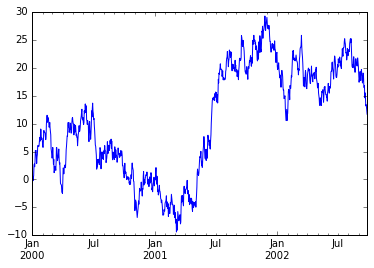

In [34]:
ts.plot()

### 数据读写

In [35]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-1.052421,-0.164992,3.098604,-0.966960
1,1.194177,0.086880,0.496095,0.265308
2,0.297724,1.284297,-0.130855,-0.229570
3,-0.787063,0.553680,0.546853,-0.322599
4,0.033174,-1.222281,0.320090,-1.749333
5,0.109575,0.310684,1.620296,-0.928869
6,0.761408,-0.027630,0.458341,-0.785370
7,-1.150479,-0.718584,1.028866,0.419026
8,-2.906881,-0.295700,-0.342306,-0.765172
9,0.916363,-1.181429,-1.559657,-1.171191


In [36]:
df.to_csv('data.csv')

In [37]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 78AE-8B3A

 Directory of C:\Users\CNJOHUA10\kamidox\work\pandas_tutor

2016-03-14  11:19 AM    <DIR>          .
2016-03-14  11:19 AM    <DIR>          ..
2015-11-16  09:24 AM               746 .gitignore
2016-03-14  09:53 AM    <DIR>          .ipynb_checkpoints
2016-03-14  11:20 AM             6,466 data.csv
2016-03-02  09:50 AM            15,291 ipython_intro.ipynb
2016-03-02  09:50 AM            32,590 numpy_intro.ipynb
2016-03-14  09:50 AM            80,919 pandas_intro_p1.ipynb
2016-03-14  09:50 AM            67,298 pandas_intro_p2.ipynb
2016-03-14  11:19 AM           108,841 pandas_intro_p3.ipynb
2016-02-24  13:20 PM               111 README.md
               8 File(s)        312,262 bytes
               3 Dir(s)  88,233,422,848 bytes free


In [38]:
# pd.read_csv('data.csv')
pd.read_csv('data.csv', index_col=0)

,A,B,C,D
0,-1.052421,-0.164992,3.098604,-0.966960
1,1.194177,0.086880,0.496095,0.265308
2,0.297724,1.284297,-0.130855,-0.229570
3,-0.787063,0.553680,0.546853,-0.322599
4,0.033174,-1.222281,0.320090,-1.749333
5,0.109575,0.310684,1.620296,-0.928869
6,0.761408,-0.027630,0.458341,-0.785370
7,-1.150479,-0.718584,1.028866,0.419026
8,-2.906881,-0.295700,-0.342306,-0.765172
9,0.916363,-1.181429,-1.559657,-1.171191
